<a href="https://colab.research.google.com/github/soumyajt1991/Facebook-Comment-Volume-Prediction/blob/main/Soumyajit%20Das%20-%20Team%205%20-%20Facebook%20Comment%20Volume%20Prediction%20-%20Capstone%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facebook Comment Volume Prediction**

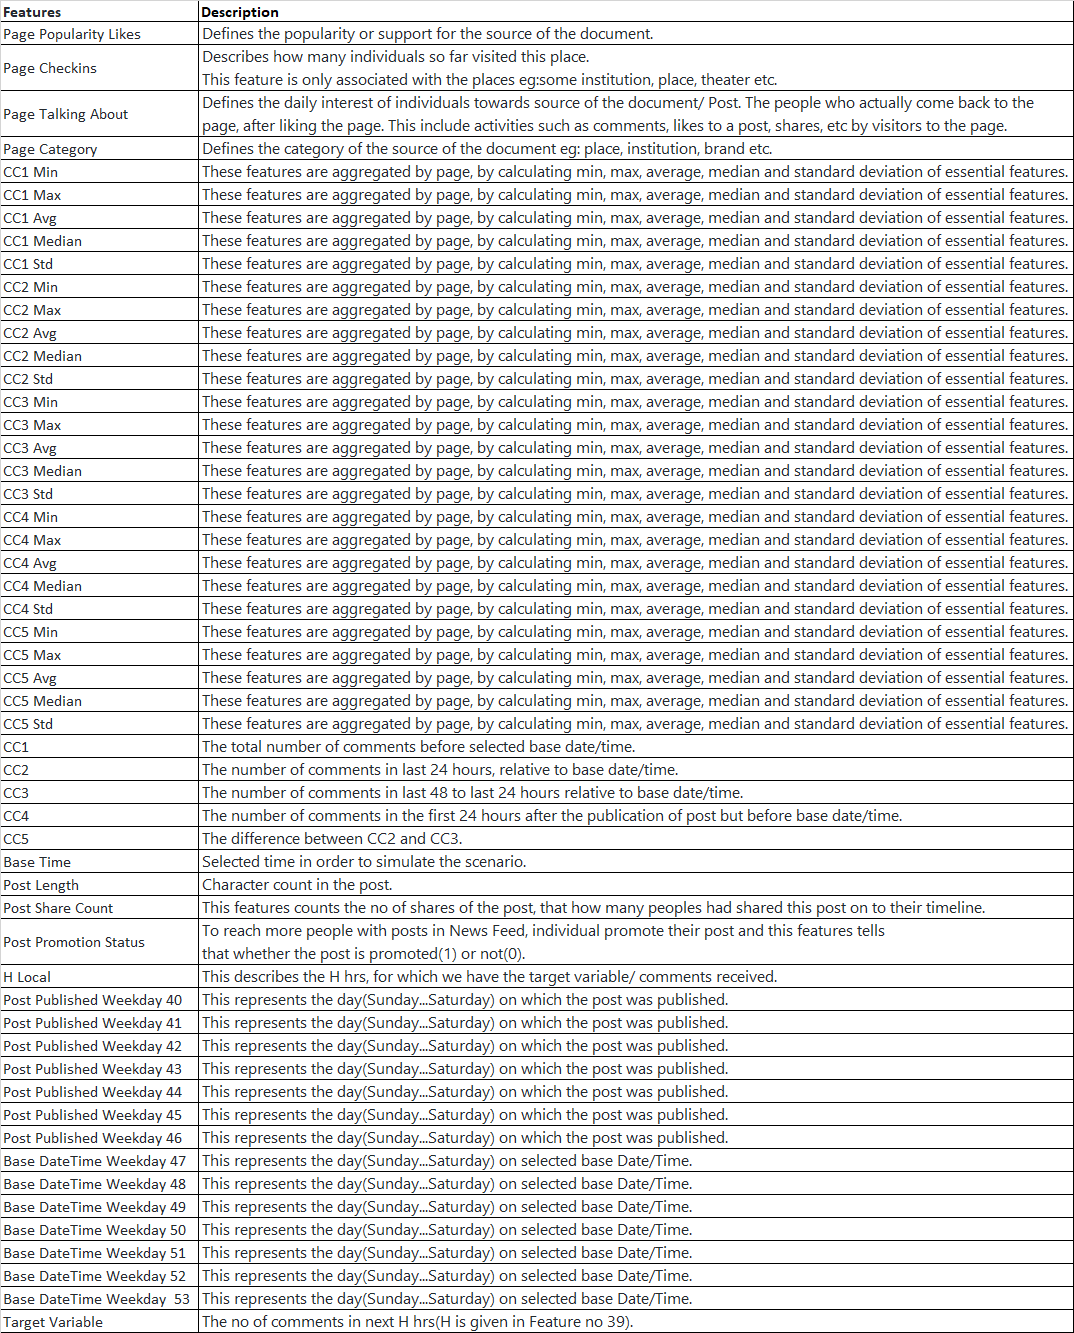

In [3]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# reading dataset 
import pandas as pd
import numpy as np
fb1_tr = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 3/Features_Variant_1.csv',header=None)

In [12]:
columns=['Likes','Checkins','Returns','Category','CC1_min','CC1_max','CC1_avg','CC1_med','CC1_sd','CC2_min','CC2_max','CC2_avg','CC2_med','CC2_sd','CC3_min','CC3_max','CC3_avg','CC3_med','CC3_sd','CC4_min','CC4_max','CC4_avg','CC4_med','CC4_sd','CC5_min','CC5_max','CC5_avg','CC5_med','CC5_sd','CC1','CC2','CC3','CC4','CC5','base_time','post_length','post_share_count','post_promotion_status','H_local','sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day','output']

In [13]:
fb1_tr.columns=columns

In [14]:
fb1_tr.head()

,Likes,Checkins,Returns,Category,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC3_min,CC3_max,CC3_avg,CC3_med,CC3_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC3,CC4,CC5,base_time,post_length,post_share_count,post_promotion_status,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sat_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,sat_base_day,output
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [15]:
fb1_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Likes                  40949 non-null  int64  
 1   Checkins               40949 non-null  int64  
 2   Returns                40949 non-null  int64  
 3   Category               40949 non-null  int64  
 4   CC1_min                40949 non-null  float64
 5   CC1_max                40949 non-null  float64
 6   CC1_avg                40949 non-null  float64
 7   CC1_med                40949 non-null  float64
 8   CC1_sd                 40949 non-null  float64
 9   CC2_min                40949 non-null  float64
 10  CC2_max                40949 non-null  float64
 11  CC2_avg                40949 non-null  float64
 12  CC2_med                40949 non-null  float64
 13  CC2_sd                 40949 non-null  float64
 14  CC3_min                40949 non-null  float64
 15  CC

In [16]:
fb1_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,40949.0,1.313814e+06,6.785752e+06,36.0,36734.000000,292911.000000,1.204214e+06,4.869723e+08
Checkins,40949.0,4.676134e+03,2.059318e+04,0.0,0.000000,0.000000,9.900000e+01,1.863700e+05
Returns,40949.0,4.480025e+04,1.109338e+05,0.0,698.000000,7045.000000,5.026400e+04,6.089942e+06
Category,40949.0,2.425478e+01,1.995058e+01,1.0,9.000000,18.000000,3.200000e+01,1.060000e+02
CC1_min,40949.0,1.586241e+00,2.075317e+01,0.0,0.000000,0.000000,0.000000e+00,2.341000e+03
CC1_max,40949.0,4.433339e+02,4.966952e+02,0.0,45.000000,241.000000,7.170000e+02,2.341000e+03
CC1_avg,40949.0,5.572038e+01,8.693355e+01,0.0,5.527273,23.374101,7.182883e+01,2.341000e+03
CC1_med,40949.0,3.564553e+01,6.996023e+01,0.0,2.000000,12.000000,4.200000e+01,2.341000e+03
CC1_sd,40949.0,6.746415e+01,8.156825e+01,0.0,8.278756,35.069140,1.025550e+02,7.313946e+02
CC2_min,40949.0,2.194681e-01,1.005515e+01,0.0,0.000000,0.000000,0.000000e+00,1.923000e+03


In [17]:
# duplicate observation check
len(fb1_tr[fb1_tr.duplicated()])

8

In [19]:
# removing duplicate observations
fb1_tr=fb1_tr.drop_duplicates()

In [20]:
fb1_tr.shape

(40941, 54)

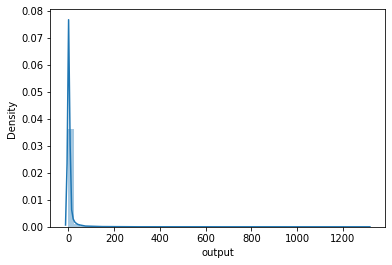

In [22]:
# target variable study
import warnings # ignore warning
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(fb1_tr['output'])
plt.show()

In [32]:
fb1_tr['output'].value_counts()

0      22573
1       5193
2       2624
3       1583
4       1171
       ...  
209        1
145        1
720        1
496        1
336        1
Name: output, Length: 361, dtype: int64

In [33]:
# checking 'category' variable
fb1_tr['Category'].value_counts()

9     7491
24    4511
18    4301
36    2387
16    1890
      ... 
62      16
63       4
58       2
93       1
83       1
Name: Category, Length: 81, dtype: int64

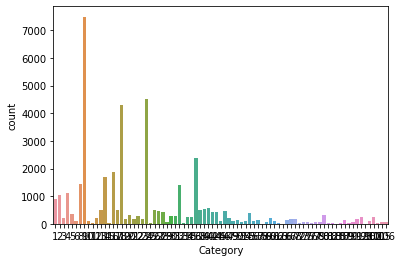

In [34]:
sns.countplot(x=fb1_tr['Category'], data=fb1_tr)
plt.show()

In [36]:
# checking 'category' variable
fb1_tr['base_time'].value_counts()

42    625
15    622
6     617
31    615
29    614
     ... 
5     513
58    512
71    503
61    496
62    489
Name: base_time, Length: 73, dtype: int64

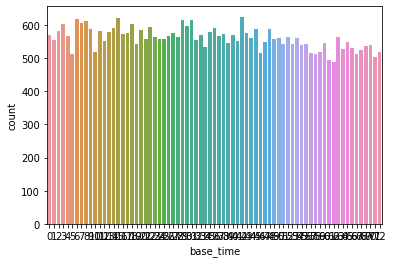

In [37]:
sns.countplot(x=fb1_tr['base_time'], data=fb1_tr)
plt.show()

In [38]:
# checking 'category' variable
fb1_tr['post_length'].value_counts()

0       4579
14       300
53       286
11       271
58       230
        ... 
975        1
943        1
815        1
783        1
2015       1
Name: post_length, Length: 1477, dtype: int64

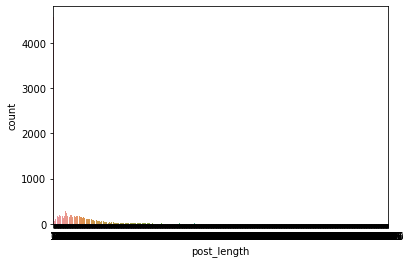

In [39]:
sns.countplot(x=fb1_tr['post_length'], data=fb1_tr)
plt.show()

In [40]:
# checking 'category' variable
fb1_tr['post_share_count'].value_counts()

1       8815
2       4486
3       2543
4       1442
5        790
        ... 
2384       1
2352       1
2320       1
2288       1
975        1
Name: post_share_count, Length: 1639, dtype: int64

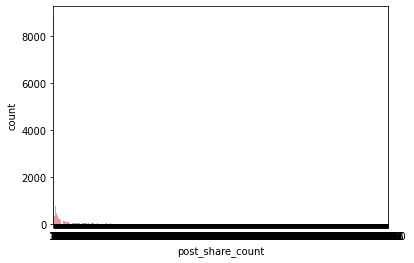

In [41]:
sns.countplot(x=fb1_tr['post_share_count'], data=fb1_tr)
plt.show()

In [42]:
# checking 'category' variable
fb1_tr['post_promotion_status'].value_counts()

0    40941
Name: post_promotion_status, dtype: int64